In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.0 MB/s eta 0:00:00


In [3]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=a5e55efc5da2746f4dff8f97b0748988f33d08e05032e0c0d068468e931138ba
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [4]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, GlobalAveragePooling2D, SeparableConv2D, Multiply
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2

# For AdamW optimizer (if available)
try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = Adam

# IPython displays
from IPython.display import display

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

/tmp/ipython-input-4035724408.py:46: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [5]:

# Kaggle imports
import kagglehub

import zipfile
import os

# Path to your ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/fer2013/fer2013.zip"

# Destination folder where contents will be extracted
extract_path = "/content/fer2013"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders/files
print(os.listdir(extract_path))

['train', 'test']


Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Training class distribution:


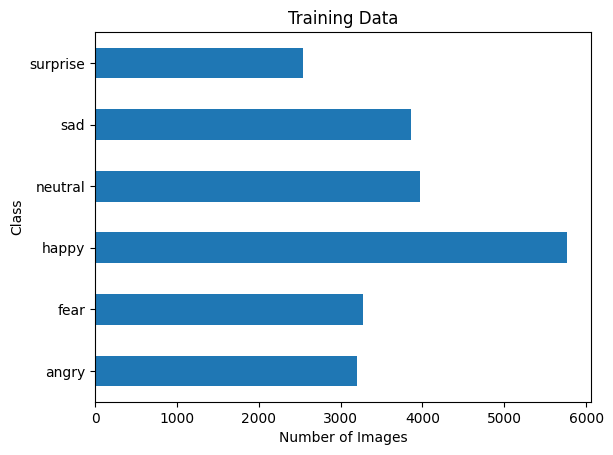

Validation class distribution:


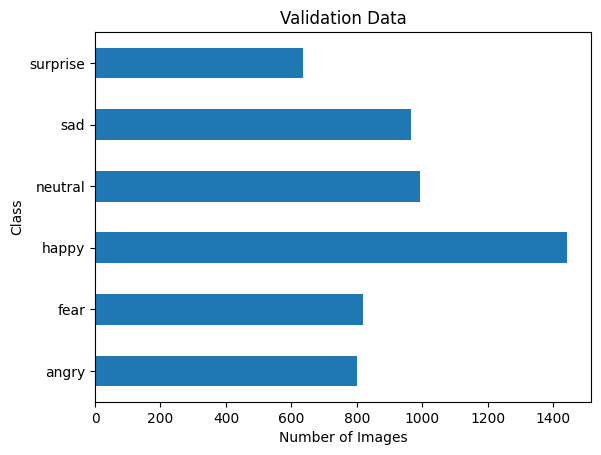

Test class distribution:


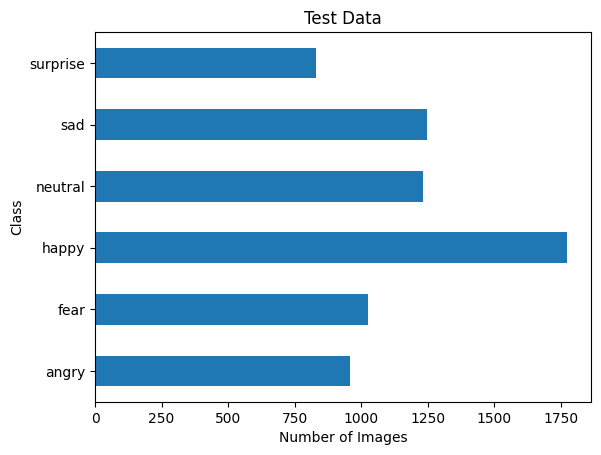

Building Deeper CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training Deeper CNN Model...
Epoch 1/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 87s 96ms/step - accuracy: 0.1914 - loss: 2.3531 - val_accuracy: 0.2446 - val_loss: 1.7521 - learning_rate: 5.0000e-04
Epoch 2/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.2195 - loss: 1.8822 - val_accuracy: 0.2680 - val_loss: 1.7326 - learning_rate: 5.0000e-04
Epoch 3/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.2419 - loss: 1.7770 - val_accuracy: 0.2920 - val_loss: 1.7055 - learning_rate: 5.0000e-04
Epoch 4/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.2840 - loss: 1.7109 - val_accuracy: 0.2985 - val_loss: 1.7760 - learning_rate: 5.0000e-04
Epoch 5/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3146 - loss: 1.6576 - val_accuracy: 0.2816 - val_loss: 1.6847 - learning_rate: 5.0000e-04
Epoch 6/80
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3638 - loss: 1.5755 - val_accuracy: 0.3810 - val_loss: 1.5566 - learning_rate: 5.0000e-04
Epoch 7/80
707/707 ━━━━

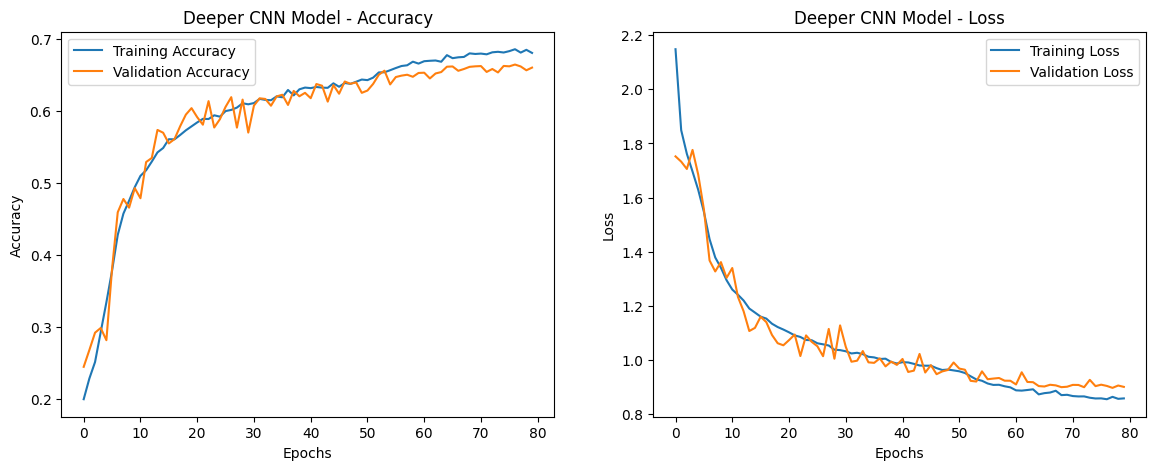

Evaluating Deeper CNN Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Classification Report for Deeper CNN
              precision    recall  f1-score   support

       angry       0.62      0.64      0.63       958
        fear       0.65      0.33      0.44      1024
       happy       0.88      0.89      0.88      1774
     neutral       0.55      0.74      0.63      1233
         sad       0.56      0.58      0.57      1247
    surprise       0.80      0.80      0.80       831

    accuracy                           0.68      7067
   macro avg       0.68      0.66      0.66      7067
weighted avg       0.69      0.68      0.67      7067



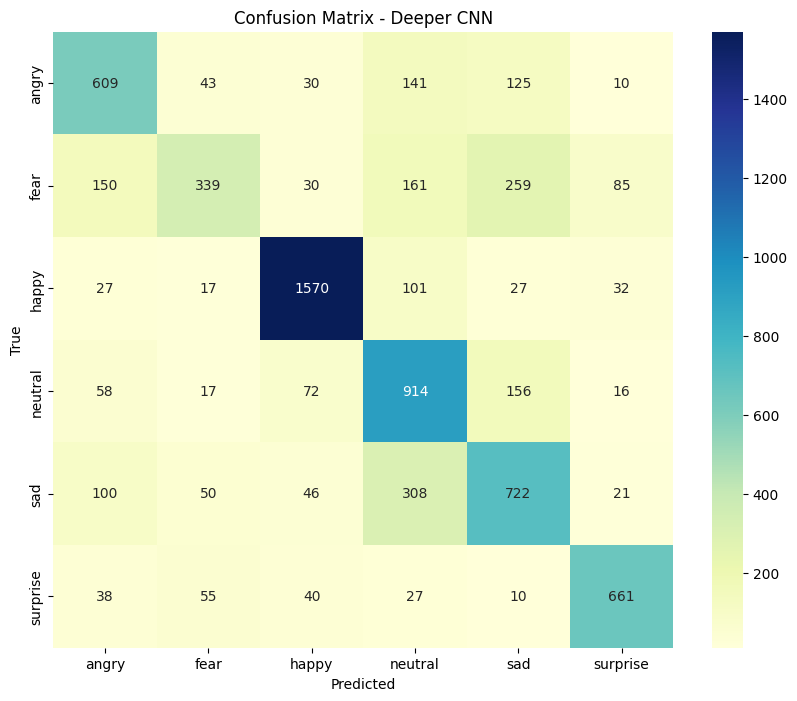

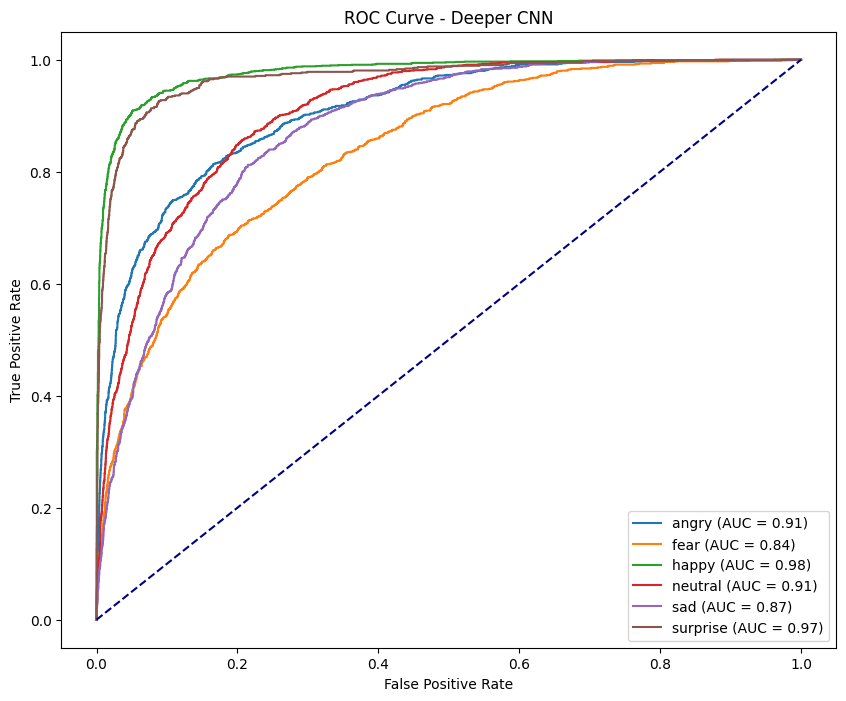

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


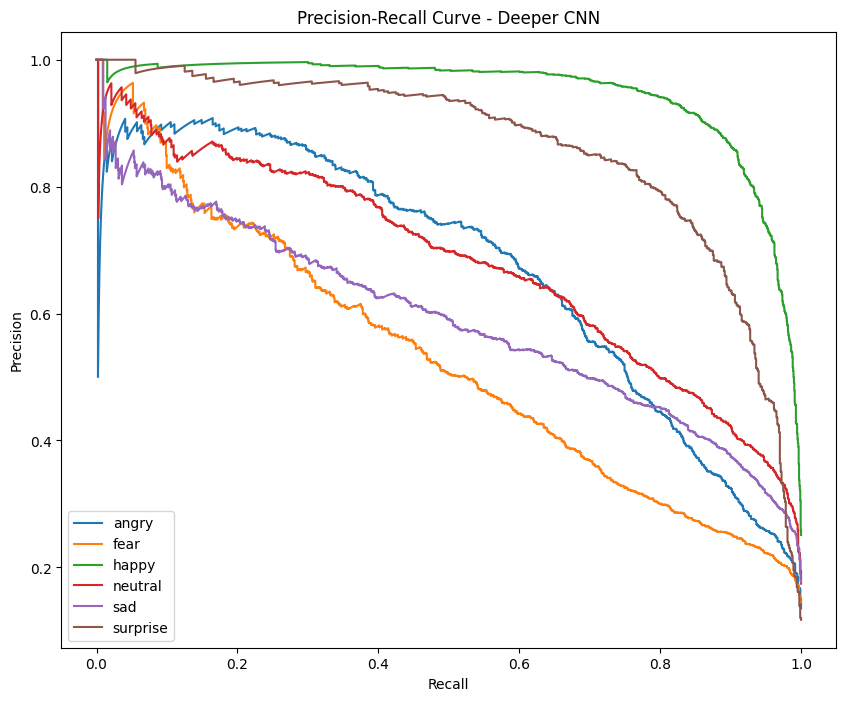

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6333 - loss: 0.9806



=== Deeper CNN Model Performance ===
Test Accuracy: 0.6813, Test Loss: 0.8757
Deeper CNN model saved successfully!


In [8]:
# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 80

TRAIN_PATH = "/content/fer2013/train"
TEST_PATH = "/content/fer2013/test"
SELECTED_CLASSES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ---------------------------- Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

def preprocess_to_vectors(generator):
    """Convert images to feature vectors for SMOTE application."""
    data, labels = [], []
    for batch_images, batch_labels in generator:
        batch_images = batch_images.reshape(batch_images.shape[0], -1)
        data.append(batch_images)
        labels.append(batch_labels)
        if len(data) * generator.batch_size >= generator.samples:
            break
    data = np.vstack(data)
    labels = np.argmax(np.vstack(labels), axis=1)
    return data, labels

def apply_smote(data, labels):
    """Apply SMOTE to balance class distribution."""
    smote = SMOTE()
    balanced_data, balanced_labels = smote.fit_resample(data, labels)
    return balanced_data, balanced_labels

# ---------------------------- Enhanced Data Preprocessing ---------------------------- #
def create_enhanced_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create enhanced data generators with better augmentation."""
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.25,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes,
        shuffle=True
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes,
        shuffle=False
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Enhanced Model Building ---------------------------- #
def build_deeper_cnn_model(input_shape, num_classes):
    """Build a deeper and more robust CNN model."""
    model = Sequential([
        # First Conv Block
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Second Conv Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Third Conv Block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Fourth Conv Block
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

# ---------------------------- Enhanced Callbacks ---------------------------- #
def get_enhanced_callbacks(model_name):
    """Get enhanced callbacks for training."""
    checkpoint = ModelCheckpoint(
        f"best_{model_name}_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=15,
        restore_best_weights=True,
        mode='max'
    )

    reduce_lr = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

# ---------------------------- Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Evaluate model and plot confusion matrix, ROC curve, and precision-recall curve."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"Classification Report for {title}")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes))

    cm = confusion_matrix(true_classes, pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        plt.plot(recall, precision, label=f'{class_name}')

    plt.title(f'Precision-Recall Curve - {title}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# ---------------------------- Training History Plot ---------------------------- #
def plot_training_history(history, title):
    """Plot training and validation accuracy and loss over epochs."""
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# ---------------------------- Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    # Use enhanced generators
    train_generator, validation_generator, test_generator = create_enhanced_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    # Print class distributions
    print("Training class distribution:")
    plot_class_distribution(train_generator, "Training Data")

    print("Validation class distribution:")
    plot_class_distribution(validation_generator, "Validation Data")

    print("Test class distribution:")
    plot_class_distribution(test_generator, "Test Data")

    # Build deeper CNN model only
    print("Building Deeper CNN Model...")
    deeper_cnn_model = build_deeper_cnn_model((IMAGE_SIZE, IMAGE_SIZE, 3), len(SELECTED_CLASSES))
    deeper_cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train deeper CNN model
    print("Training Deeper CNN Model...")
    history_deeper = deeper_cnn_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=get_enhanced_callbacks("deeper_cnn"),
        verbose=1
    )

    # Plot training history
    plot_training_history(history_deeper, "Deeper CNN Model")

    # Evaluate model
    print("Evaluating Deeper CNN Model...")
    evaluate_and_plot_metrics(deeper_cnn_model, test_generator, SELECTED_CLASSES, "Deeper CNN")

    # Generate predictions and plot PR curve
    deeper_predictions = deeper_cnn_model.predict(test_generator)
    plot_precision_recall_curve(test_generator, deeper_predictions, SELECTED_CLASSES, "Deeper CNN")

    # Get final test performance
    deeper_test_loss, deeper_test_acc = deeper_cnn_model.evaluate(test_generator)

    print("\n=== Deeper CNN Model Performance ===")
    print(f"Test Accuracy: {deeper_test_acc:.4f}, Test Loss: {deeper_test_loss:.4f}")

    # Save model
    deeper_cnn_model.save('fer_deeper_cnn_model.h5')
    print("Deeper CNN model saved successfully!")

Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Training class distribution:


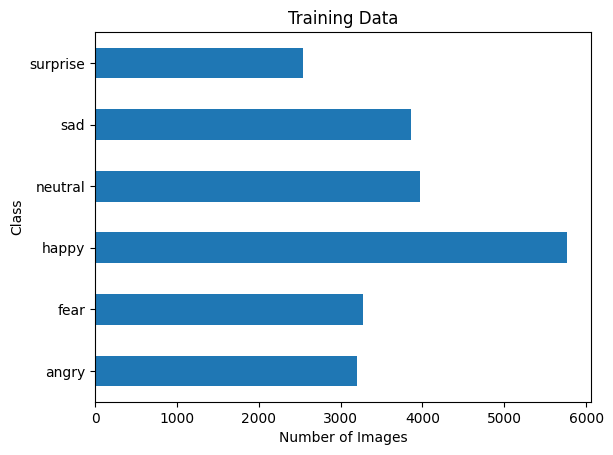

Validation class distribution:


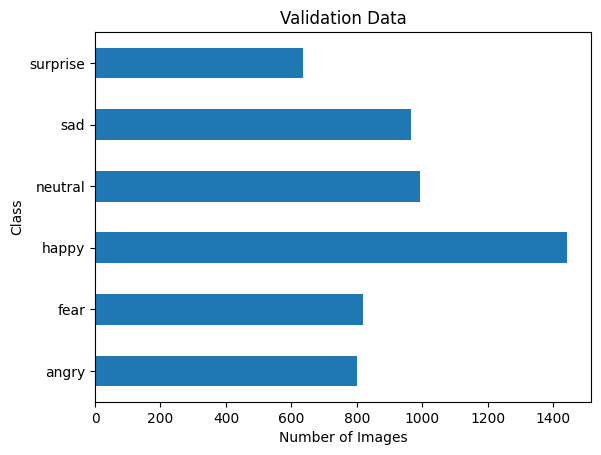

Test class distribution:


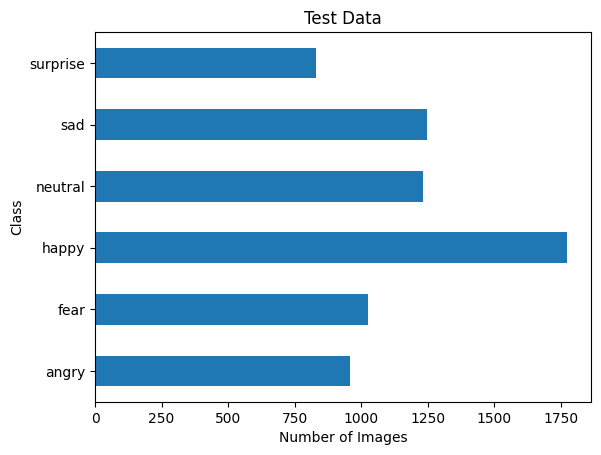

Building Deeper CNN Model...
Training Deeper CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 83s 179ms/step - accuracy: 0.1808 - loss: 2.3834 - val_accuracy: 0.2561 - val_loss: 1.7695 - learning_rate: 5.0000e-04
Epoch 2/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step - accuracy: 0.2157 - loss: 1.9423 - val_accuracy: 0.2547 - val_loss: 1.7428 - learning_rate: 5.0000e-04
Epoch 3/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 137ms/step - accuracy: 0.2378 - loss: 1.8369 - val_accuracy: 0.2863 - val_loss: 1.7050 - learning_rate: 5.0000e-04
Epoch 4/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 136ms/step - accuracy: 0.2550 - loss: 1.7692 - val_accuracy: 0.3016 - val_loss: 1.7019 - learning_rate: 5.0000e-04
Epoch 5/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 49s 137ms/step - accuracy: 0.3042 - loss: 1.6967 - val_accuracy: 0.3008 - val_loss: 1.7867 - learning_rate: 5.0000e-04
Epoch 6/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.3391 - loss: 1.6171 - val_accuracy: 0.3903 - val_loss: 1.5221 - learning_rate: 5.0000e-04
Epoch 7/80
354/354 ━━━━━━━━━━━━━━━━━━━━ 48s 13

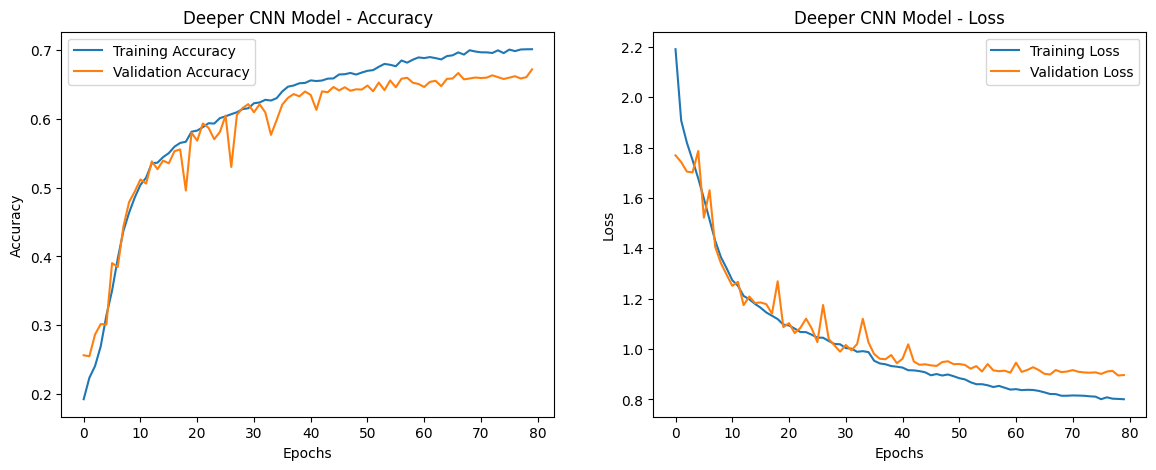

Evaluating Deeper CNN Model...
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step
Classification Report for Deeper CNN
              precision    recall  f1-score   support

       angry       0.61      0.64      0.63       958
        fear       0.63      0.37      0.46      1024
       happy       0.87      0.89      0.88      1774
     neutral       0.55      0.74      0.63      1233
         sad       0.58      0.53      0.56      1247
    surprise       0.78      0.82      0.80       831

    accuracy                           0.68      7067
   macro avg       0.67      0.66      0.66      7067
weighted avg       0.68      0.68      0.68      7067



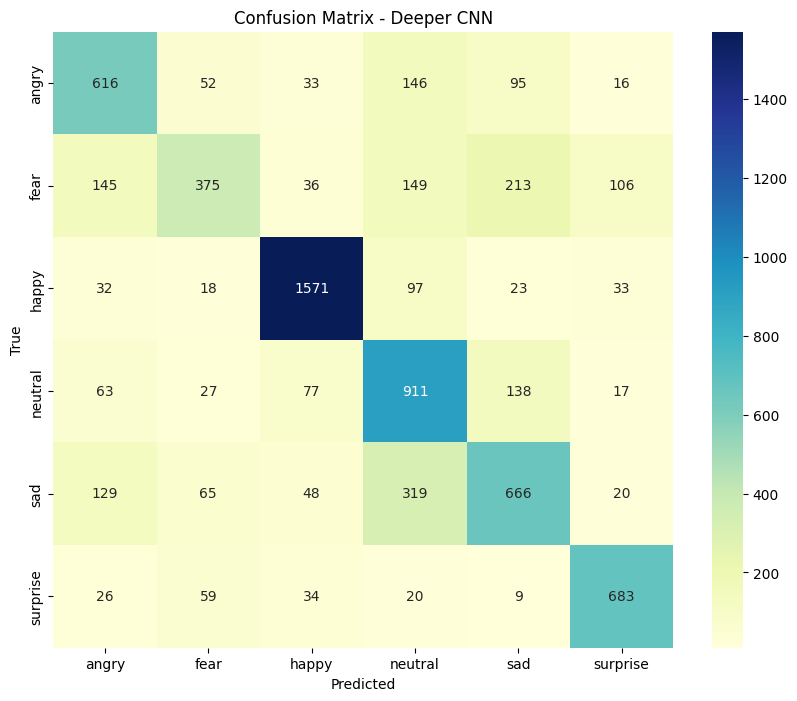

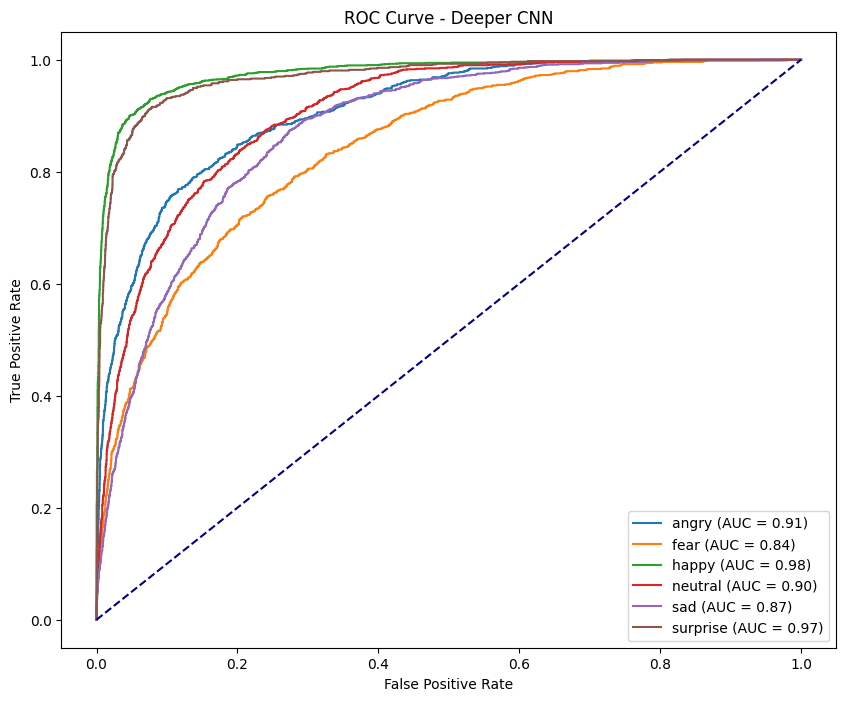

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


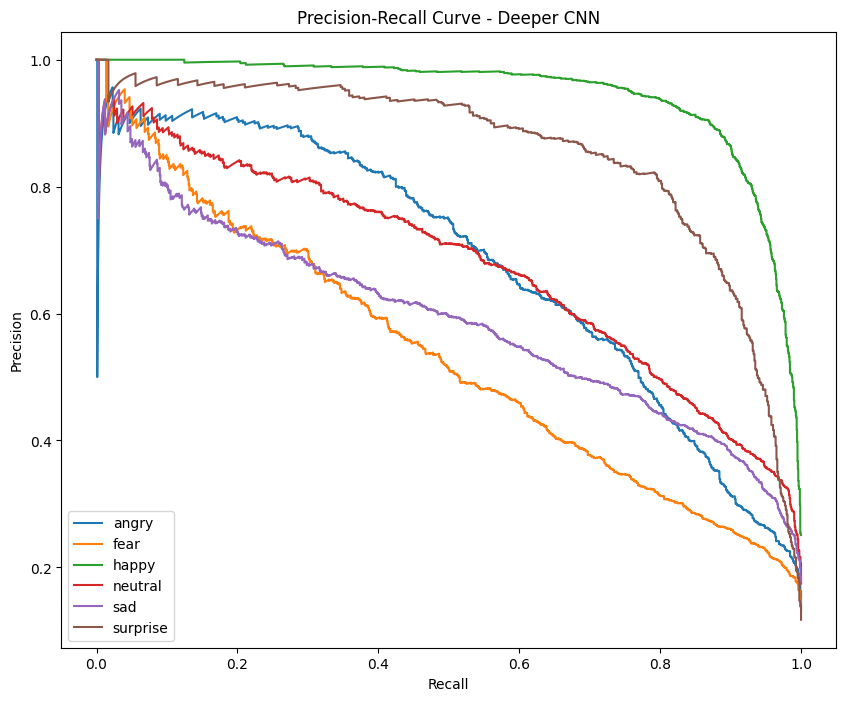

111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6416 - loss: 0.9587



=== Deeper CNN Model Performance ===
Test Accuracy: 0.6823, Test Loss: 0.8833
Deeper CNN model saved successfully!


In [9]:
# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 64
EPOCHS = 80

TRAIN_PATH = "/content/fer2013/train"
TEST_PATH = "/content/fer2013/test"
SELECTED_CLASSES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ---------------------------- Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

def preprocess_to_vectors(generator):
    """Convert images to feature vectors for SMOTE application."""
    data, labels = [], []
    for batch_images, batch_labels in generator:
        batch_images = batch_images.reshape(batch_images.shape[0], -1)
        data.append(batch_images)
        labels.append(batch_labels)
        if len(data) * generator.batch_size >= generator.samples:
            break
    data = np.vstack(data)
    labels = np.argmax(np.vstack(labels), axis=1)
    return data, labels

def apply_smote(data, labels):
    """Apply SMOTE to balance class distribution."""
    smote = SMOTE()
    balanced_data, balanced_labels = smote.fit_resample(data, labels)
    return balanced_data, balanced_labels

# ---------------------------- Enhanced Data Preprocessing ---------------------------- #
def create_enhanced_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create enhanced data generators with better augmentation."""
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.25,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes,
        shuffle=True
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes,
        shuffle=False
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Enhanced Model Building ---------------------------- #
def build_deeper_cnn_model(input_shape, num_classes):
    """Build a deeper and more robust CNN model."""
    model = Sequential([
        # First Conv Block
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Second Conv Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Third Conv Block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Fourth Conv Block
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.35),

        # Classifier
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.35),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.35),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.35),
        Dense(num_classes, activation='softmax')
    ])
    return model

# ---------------------------- Enhanced Callbacks ---------------------------- #
def get_enhanced_callbacks(model_name):
    """Get enhanced callbacks for training."""
    checkpoint = ModelCheckpoint(
        f"best_{model_name}_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=15,
        restore_best_weights=True,
        mode='max'
    )

    reduce_lr = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

# ---------------------------- Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Evaluate model and plot confusion matrix, ROC curve, and precision-recall curve."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"Classification Report for {title}")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes))

    cm = confusion_matrix(true_classes, pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        plt.plot(recall, precision, label=f'{class_name}')

    plt.title(f'Precision-Recall Curve - {title}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

# ---------------------------- Training History Plot ---------------------------- #
def plot_training_history(history, title):
    """Plot training and validation accuracy and loss over epochs."""
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# ---------------------------- Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    # Use enhanced generators
    train_generator, validation_generator, test_generator = create_enhanced_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    # Print class distributions
    print("Training class distribution:")
    plot_class_distribution(train_generator, "Training Data")

    print("Validation class distribution:")
    plot_class_distribution(validation_generator, "Validation Data")

    print("Test class distribution:")
    plot_class_distribution(test_generator, "Test Data")

    # Build deeper CNN model only
    print("Building Deeper CNN Model...")
    deeper_cnn_model = build_deeper_cnn_model((IMAGE_SIZE, IMAGE_SIZE, 3), len(SELECTED_CLASSES))
    deeper_cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train deeper CNN model
    print("Training Deeper CNN Model...")
    history_deeper = deeper_cnn_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=get_enhanced_callbacks("deeper_cnn"),
        verbose=1
    )

    # Plot training history
    plot_training_history(history_deeper, "Deeper CNN Model")

    # Evaluate model
    print("Evaluating Deeper CNN Model...")
    evaluate_and_plot_metrics(deeper_cnn_model, test_generator, SELECTED_CLASSES, "Deeper CNN")

    # Generate predictions and plot PR curve
    deeper_predictions = deeper_cnn_model.predict(test_generator)
    plot_precision_recall_curve(test_generator, deeper_predictions, SELECTED_CLASSES, "Deeper CNN")

    # Get final test performance
    deeper_test_loss, deeper_test_acc = deeper_cnn_model.evaluate(test_generator)

    print("\n=== Deeper CNN Model Performance ===")
    print(f"Test Accuracy: {deeper_test_acc:.4f}, Test Loss: {deeper_test_loss:.4f}")

    # Save model
    deeper_cnn_model.save('fer_deeper_cnn_model.h5')
    print("Deeper CNN model saved successfully!")